# ICS2205 - Web Intelligence 40% Assignment
## Task 2 - Graph Analysis

It was arranged between group members that the division of work would be as follows:

    - Task 1: Text Analysis - Nathan Camilleri 251800L
    - Task 2: Graph Analysis - Francesca Maria Mizzi 118201L

In the following Jupyter Notebook, a graph analysis was carried out on the Enron data set which contains 297,000 emails.
The analysis was carried out on the sender and the receiver of the emails (the "To" and "From"). The goal of the analysis was to create and visual a graph based on the data extracted from the emails' sender and receicer.

The first step is to import all the required libraries in order to carry out the analysis.

In [15]:
import json
import networkx as nx
import math
import operator
import matplotlib.pyplot as plt
import os
import re
import weakref
import numpy as np
import pandas as pd
import nltk
import random
from email.parser import Parser
from collections import Counter, defaultdict
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

A class is then created in order to store the variables required from the emails which in this case are the "to" and "from"

In [2]:
class Email:
    instances = []

    def __init__(self, email_from, email_to):
        self.__class__.instances.append(weakref.proxy(self))
        self.email_from = email_from
        self.email_to = email_to

In [3]:
parser = Parser()
ps = PorterStemmer()  # Creating an object of class PorterStemmer()
stopwords = ENGLISH_STOP_WORDS.union(['ect', 'hou', 'com', 'recipient'])

In [4]:
instances = []

def __init__(self, email_from, email_to):
    self.__class__.instances.append(weakref.proxy(self))
    self.email_from = email_from
    self.email_to = email_to

In [5]:
def filter_characters(text):  # To remove all special characters
    regex = re.compile('[^a-zA-Z0-9\s]')
    return re.sub(regex, '', text)


def list_to_string(s):
    str1 = ""
    for ele in s:
        str1 += ele
    return str1

It is then required to create the method which will parse each email and extract the required information and store them in an instance of the email class defined earlier.

In [6]:
def parse_file(email):
    if email.get('From') and email.get('To') and email.get('subject') and email.get_payload()\
            and ', ' not in email.get('To') and email.get('From') != email.get('To'):

        email_from = email.get('From')
        email_to = email.get('To')
        email_subject = email.get('Subject')
        
        emails.append(Email(email_from, email_to))


We must then pass each email from each folder into the parser individually and store each instance in a list of emails.

In [8]:
if __name__ == '__main__':
    emails = []
    nodes = []
    links = []
    arr = []

    for subdir, dirs, files in os.walk('maildir'):
        for file in files:
            filepath = subdir + os.sep + file
            if filepath.endswith(""):
                with open(filepath) as f:
                    file_content = f.readlines()
                    file_content = list_to_string(file_content)
                    email = parser.parsestr(file_content)
                    parse_file(email)

The graph which stores all the relation is then initialized

In [10]:
graph = nx.DiGraph()

Each email is then entered into the graph indivdually, take the "to" and "from" as nodes and the email sent as the link. Initially, the weight of the link is set to 1, however, should multiple emails be sent, the weight is increased for every email which is sent.

In [13]:
entry = 0;
for x in emails:
    to = emails[entry].email_to
    fr = emails[entry].email_from
    if graph.has_edge(to,fr):
        graph[to][fr]['weight'] += 1
    else:
        graph.add_edge(to,fr, weight = 1)
    entry = entry + 1

To begin the analysis, a histogram for the undirected degree distribution of the graph was created. A degree distribution measures the probability that a randomly chosen node has a certain degree.

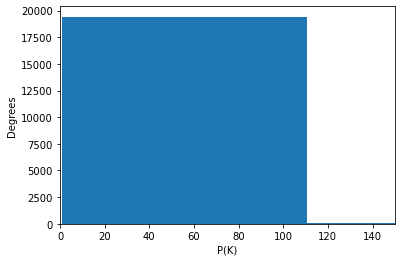

In [89]:
def plot_degree_dist(graph):
    degrees = [graph.degree(n) for n in graph.nodes()]
    plt.hist(degrees, bins = 10)
    plt.xlim(0, 150)
    plt.ylabel("Degrees")
    plt.xlabel("P(K)")
    plt.show()

plot_degree_dist(graph)

The second step of the analysis was to generate the in-degree distribution and the out-degree distribution of the data. The difference between these degree distributions and the previous degree distribution is that in this case we are taking into account whether the the edge is connected to a vertice by its head (in-degree) or by its tail (out-degree).

Text(0, 0.5, 'Frequency')

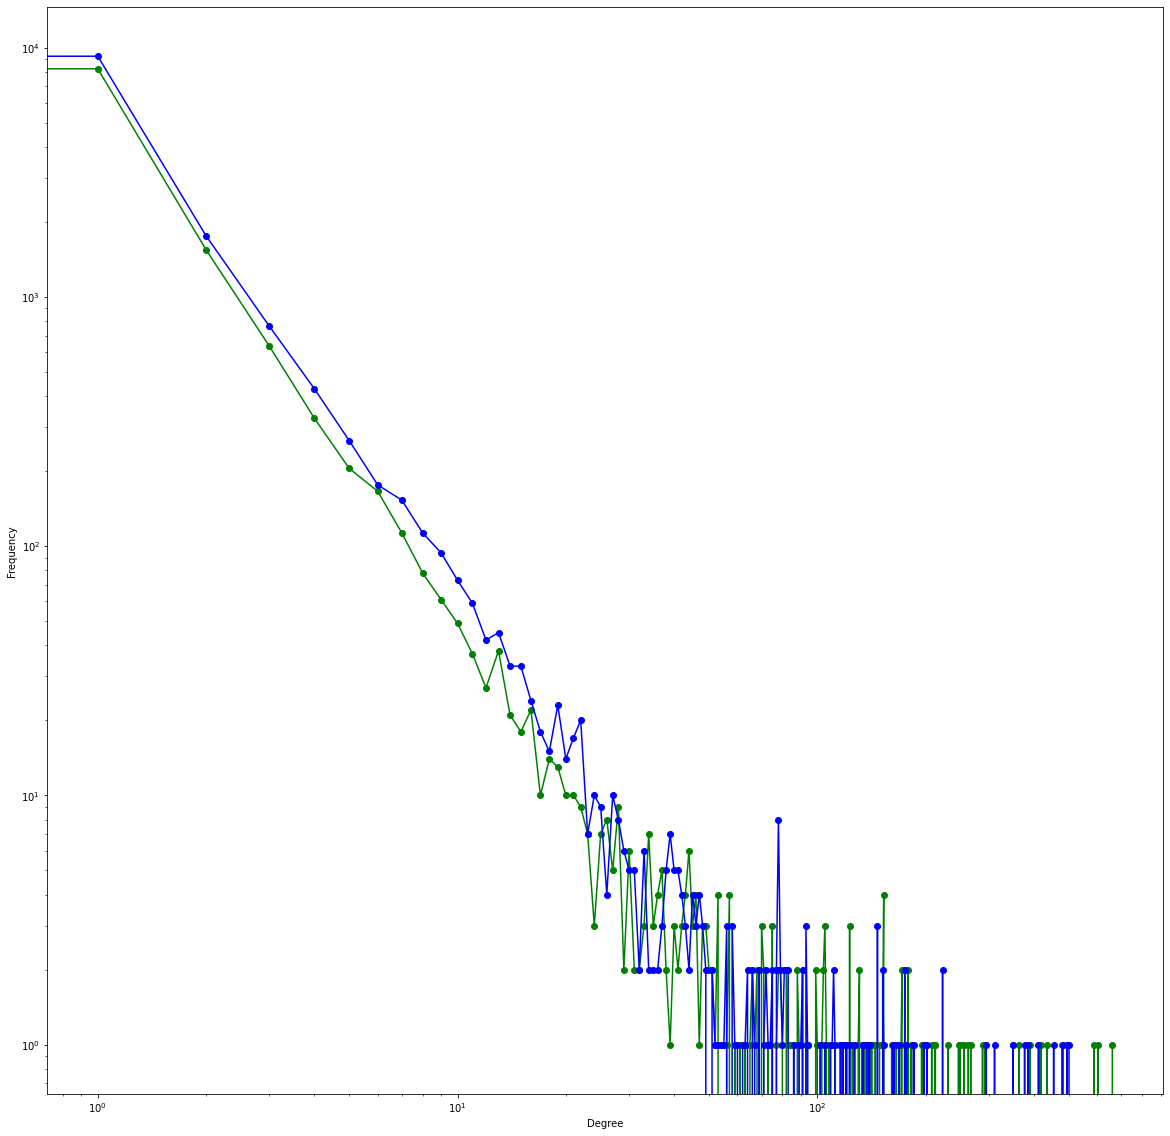

In [79]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

in_degree_freq = degree_histogram_directed(graph, in_degree=True)
out_degree_freq = degree_histogram_directed(graph, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(20, 20)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')

As we can see in the above graph, the majority of email adresses have only been sent or have only sent or been sent a few emails.

The next piece of information to withdraw is the diameter of the graph. The diameter of a graph is the shortest path between each pair of vertices. However, in order to calculate the diameter of a graph, the graph must be complete. This means that each vertex must be adjacent to every other vertex. This is not the case in our graph. Therefore, in order to calculate the diameter, we must create a subgraph of the largest strongly connected components of our main graph and calculate the diameter of that.

In [18]:
largest = max(nx.strongly_connected_components(graph), key=len)
largesubgraph = graph.subgraph(largest)

print("Diameter of graph: ", nx.diameter(largesubgraph))

Diameter of graph:  13


In this case, we can see that the diameter of our subgraph is 13. This means the longest shortest path between any two nodes in the largest strongly connected network is 13.

The next part of the analysis is to calculate the average path length of the graph. This is the average length of the shortest
paths between the nodes in the graph. In order to use the library command of average_shortest_path_length(), we must first convert the graph to a path graph. A path graph is a graph P_n of n nodes linearly connected by n-1 edges.

In [19]:
Ga = nx.path_graph(graph)
print("Average path length: ",nx.average_shortest_path_length(Ga))

Average path length:  6513.333333333333


As we can see above, the average path length is 6513.33 which is expected from a graph with over 17,000 vertices.

The next step is to calculate the global clustering coefficient. The clustering coefficient is ratio of the number of connections between the neighbours of each node and the total number of possible connections between the same neighbours.

In [ ]:
Gc = nx.complete_graph(graph)
print("Global clustering coefficient: ",nx.clustering(Gc))

Unfortunately, due to hardware restrictions, any attempt to process the global clustering coefficient results in the notebook crashing.

We must next calculate the compactness of the graph. Compactness is the ratio between the number of existing edges and the number of all the possible edges. The compactness of a graph is measured between 0 and 1.

In [20]:
e = len(graph.edges())
n = len(graph.nodes())

compactness = (2*e)/((n*n)-n)
print("Compactness: ", compactness)

Compactness:  0.00023817495681016055


As we can see, the compactness of this graph is 0.0002 which fits our range of 0 and 1. We can see that in this case, the compactness is very low which means that most of the nodes are only connected to a few of the other nodes and not all of them. We can see that this is in fact the case further when comparing the compactness to the in-degree and out-degree histogram which is generated prior. In both cases, the majority of email addressess have only a few connections. 

The next step is to calculate the betweenness centrality of the graph. The betweenness centrality considers those nodes which are traversed in many shortest paths to be more important than others.

In [ ]:
betcen = nx.betweenness_centrality(graph)
print("Betweenness Centrality: ", betcen)

Unfortunately, due to hardware limitations, any attempt to calculate the betweenness centrality of the graph resulted in the notebook crashing.

The next piece of information to calculate is the page rank. Page rank returns a ranking over the influential nodes in the
network that extends beyond their direct connections.

In [92]:
print("Page Rank: ", nx.pagerank(graph))

Page Rank:  {'k..allen@enron.com': 0.0010132810994370406, 'heather.dunton@enron.com': 0.0001530365435017047, 'pallen@enron.com': 1.331802261511886e-05, 'anchordesk_daily@anchordesk.zdlists.com': 1.4071685142141166e-05, 'subscriptions@intelligencepress.com': 0.00016250740663378488, 'prizemachine@feedback.iwon.com': 1.4418081853313737e-05, 'arsystem@mailman.enron.com': 0.003033378196715722, 'exclusive_offers@sportsline.com': 0.00017155942984931852, 'gthorse@keyad.com': 3.9470787638201093e-05, 'hunter.williams@grandecom.com': 1.8510175697670152e-05, 'richard.morgan@austinenergy.com': 3.9470787638201093e-05, 'jsmith@austintx.com': 4.700741290842416e-05, 'wise.counsel@lpl.com': 6.562355266128333e-05, 'renee.ratcliff@enron.com': 9.076453857750033e-05, 'monica.l.brown@accenture.com': 0.00012428578298724461, 'david.port@enron.com': 0.000495718937488669, 'webmaster@earnings.com': 1.4825347669163472e-05, 'delivers@amazon.com': 1.5478791024437694e-05, 'einsighthtml@listserv.ftenergy.com': 1.33180

The next step is to create a visualization of the graph after we have extracted all the data. In order to make the graph more legible, we will change the size of a node based on its degree as well as changing the colour of an edge based on its weight. In order to colour an edge according to its weight, we must first check the weight of each edge and should it fit within a specific color range, it is placed into a list of edges.

In [94]:
list_degree=list(graph.degree())
nodes , degree = map(list, zip(*list_degree))

weights = [graph[u][v]['weight'] for u,v in edges]

eblue=[(u,v) for (u,v,d) in graph.edges(data=True) if d['weight'] ==1]
egreen=[(u,v) for (u,v,d) in graph.edges(data=True) if d['weight'] <=100 and d['weight']> 1]
eyellow=[(u,v) for (u,v,d) in graph.edges(data=True) if d['weight'] <=200 and d['weight']>100]
eorange=[(u,v) for (u,v,d) in graph.edges(data=True) if d['weight'] <=600 and d['weight']>200]
ered=[(u,v) for (u,v,d) in graph.edges(data=True) if d['weight'] >600]

We will then plot the graph. In order to plot the graph, we will start by first plotting the nodes with their size caluclated based of the weight and we will then plot the edges in parts based off of the color we wish it to have.

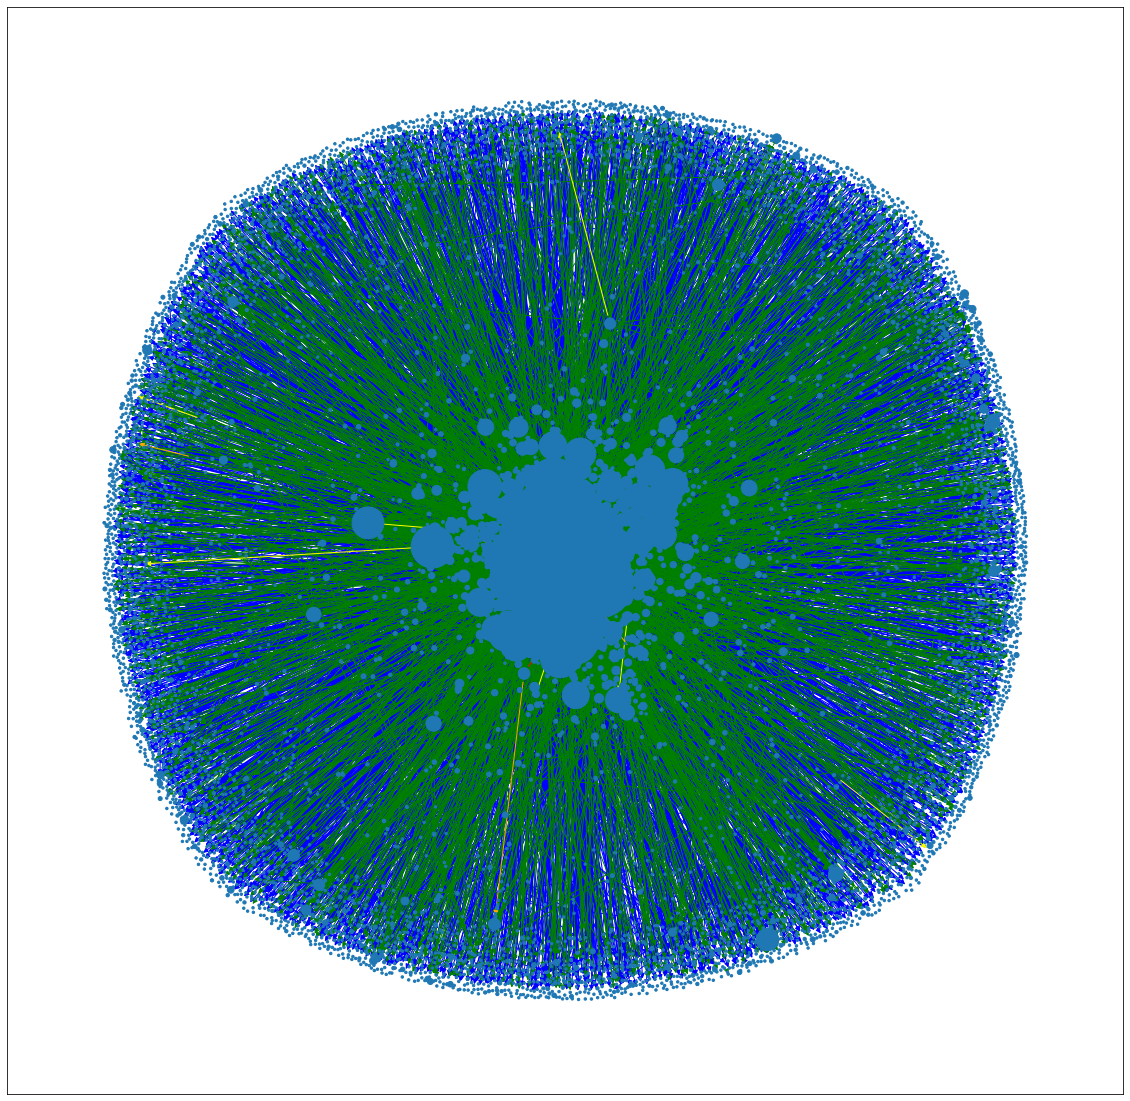

In [72]:
plt.figure(3,figsize=(20,20)) 
pos = nx.spring_layout(graph)

nx.draw_networkx_nodes(graph, pos,nodelist=nodes, node_size=[(v * 5)+1 for v in degree])

nx.draw_networkx_edges(graph, pos, edgelist=eblue, width=1, edge_color='b')
nx.draw_networkx_edges(graph, pos, edgelist=egreen, width=1, edge_color='g')
nx.draw_networkx_edges(graph, pos, edgelist=eyellow, width=1, edge_color="yellow")
nx.draw_networkx_edges(graph, pos, edgelist=eorange, width=1, edge_color="orange")
nx.draw_networkx_edges(graph, pos, edgelist=ered, width=1, edge_color='r')


plt.show()


Due to the large dataset, any attempt to add labels to the graph resulted in it becoming entirely black therefore it was decided that we will plot without labels. As can be seen in the graph above, the majority of the edges are blue and secondly green. This compliments our previous observations in the degree distributions as well as the compactness which showed that a majority of nodes where only sent or received one email. 